In [163]:
import pandas as pd
import sklearn.cluster as clst
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn.preprocessing as pp
import sklearn.linear_model as reg
import sklearn.model_selection as ms

In [164]:
df = pd.read_csv("ml-exam4-data.csv")
df_num = df.copy().drop("occupation", axis=1)
df_num.describe()

,annual_income,monthly_spending
count,30.000000,30.000000
mean,215303.866667,1054.066667
std,210956.226638,879.275993
min,36000.000000,139.000000
25%,54386.000000,182.000000
50%,93835.000000,1003.500000
75%,481085.750000,1236.750000
max,550000.000000,3116.000000


Text(0.5, 1.0, 'Annual Income')

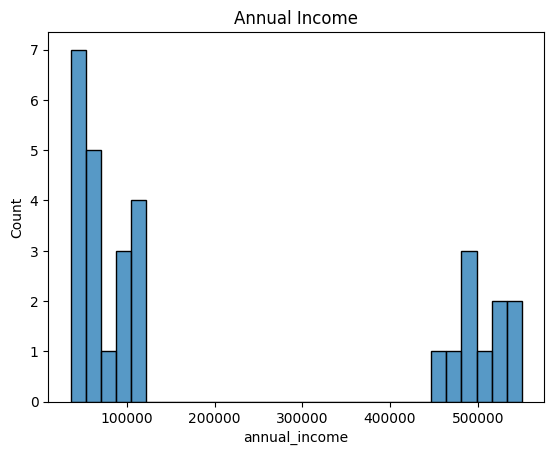

In [165]:
sns.histplot(df, x="annual_income", bins=30)
plt.title("Annual Income")

Text(0.5, 1.0, 'Monthly Spending')

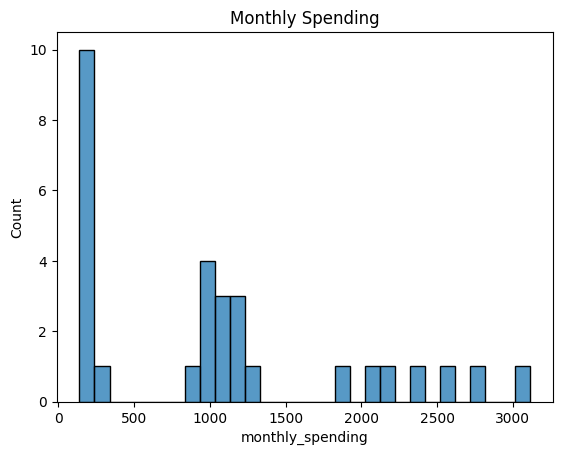

In [166]:
sns.histplot(df, x="monthly_spending", bins=30)
plt.title("Monthly Spending")

Text(0.5, 1.0, 'Occupation')

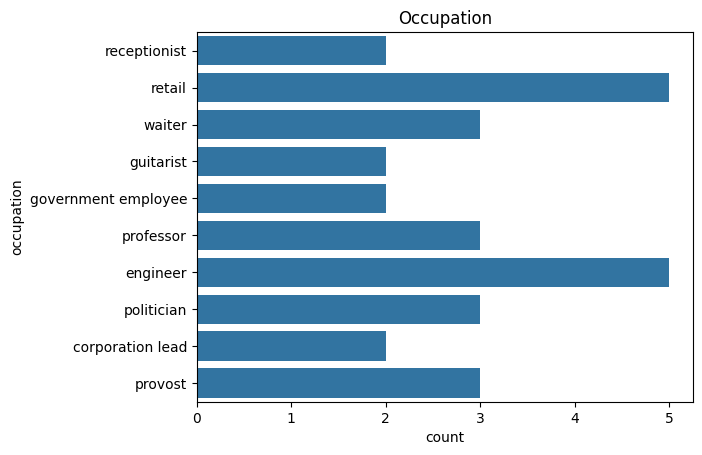

In [167]:
sns.countplot(df, y="occupation")
plt.title("Occupation")

In [168]:
df_num["monthly_income"] = df_num["annual_income"] / 12
df_num["percent_spent_monthly"] = df_num["monthly_spending"] / df_num["monthly_income"]
df_num["percent_spent_monthly"] = df_num["percent_spent_monthly"].apply(lambda x: x if x != np.inf else 1)

Text(0.5, 1.0, 'Monthly Spending vs Annual Income')

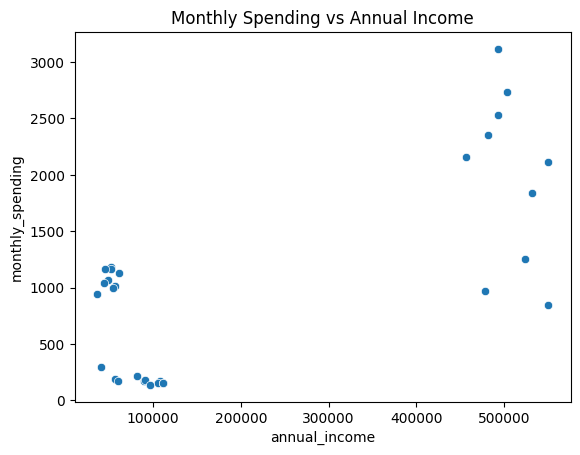

In [169]:
scale = pp.StandardScaler()
df_norm = scale.fit_transform(df_num)
sns.scatterplot(df_num, x="annual_income", y="monthly_spending")
plt.title("Monthly Spending vs Annual Income")

Text(0.5, 1.0, 'Percent of Monthly Income Spent')

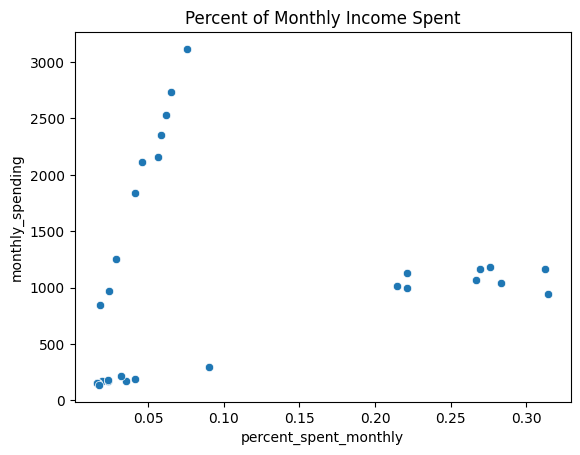

In [170]:
sns.scatterplot(df_num, x="percent_spent_monthly", y="monthly_spending")
plt.title("Percent of Monthly Income Spent")

Text(0, 0.5, 'Total Distance from Points to Cluster Centers')

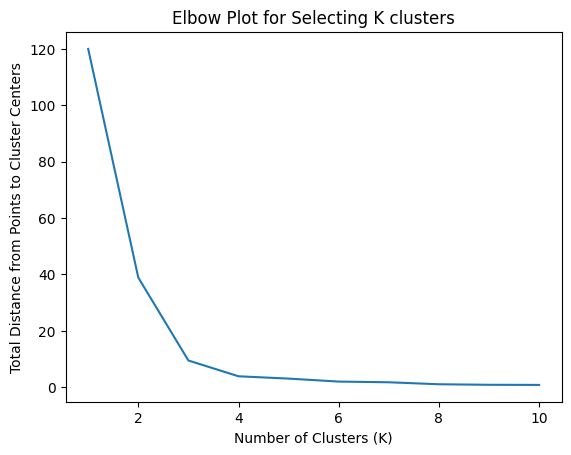

In [171]:
inertias = np.zeros(10)
k_values = np.arange(1, 11)

for i in k_values:
    kmeans = clst.KMeans(n_clusters=i)
    kmeans.fit(df_norm)
    inertias[i-1] = kmeans.inertia_


plt.plot(k_values, inertias)
plt.title("Elbow Plot for Selecting K clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Total Distance from Points to Cluster Centers")

Text(0.5, 1.0, 'Percent of Monthly Income Spent with Clusters')

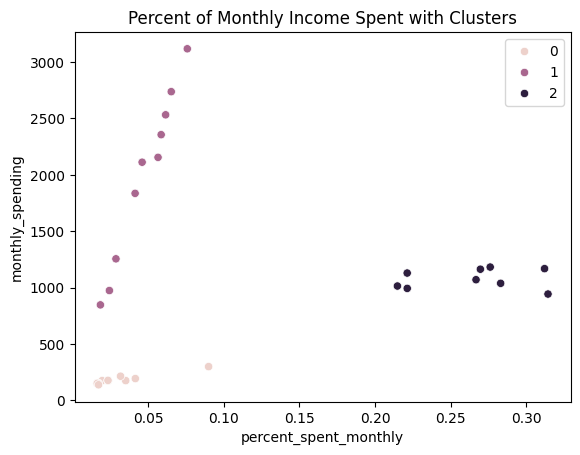

In [172]:
kmeans = clst.KMeans(n_clusters=3)
kmeans.fit(df_norm)
sns.scatterplot(df_num, x="percent_spent_monthly", y="monthly_spending", hue=kmeans.labels_)
plt.title("Percent of Monthly Income Spent with Clusters")

In [173]:
df_num["labels"] = kmeans.labels_
df["labels"] = kmeans.labels_

Text(0.5, 1.0, 'Annual Income of Group 1')

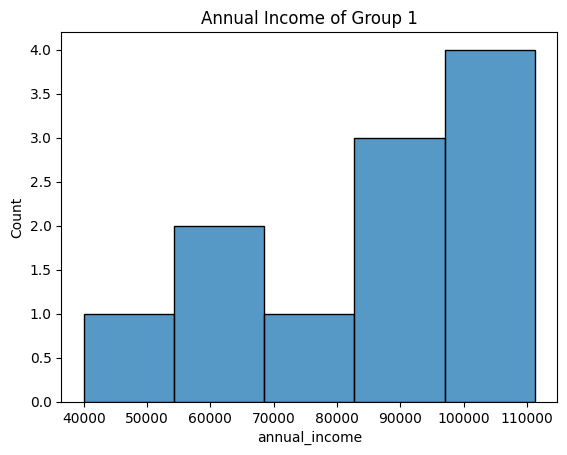

In [158]:
sns.histplot(df_num[df_num["labels"] == 2], x="annual_income")
plt.title("Annual Income of Group 1")

Text(0.5, 1.0, 'Occupations of Group 0')

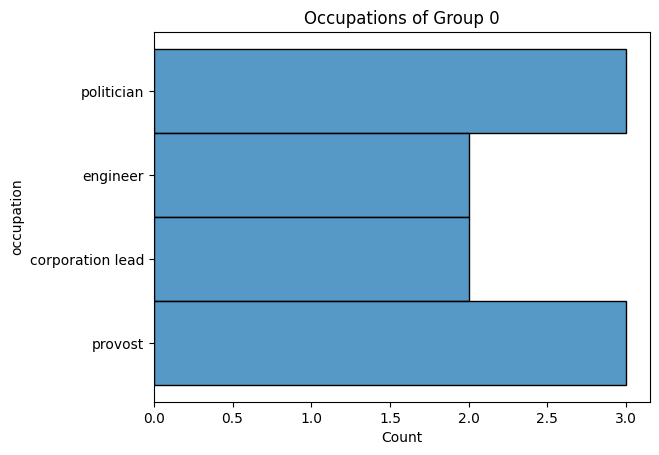

In [179]:
sns.histplot(df[df["labels"] == 1], y="occupation")
plt.title("Occupations of Group 0")

Text(0.5, 1.0, 'Occupations of Group 1')

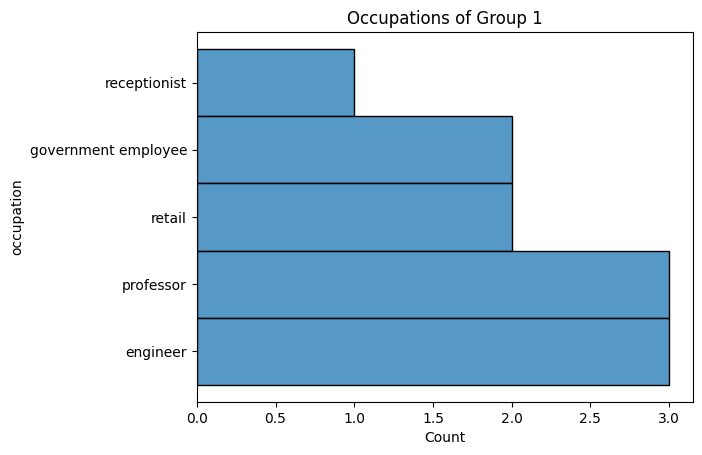

In [178]:
sns.histplot(df[df["labels"] == 0], y="occupation")
plt.title("Occupations of Group 1")

Text(0.5, 1.0, 'Occupations of Group 2')

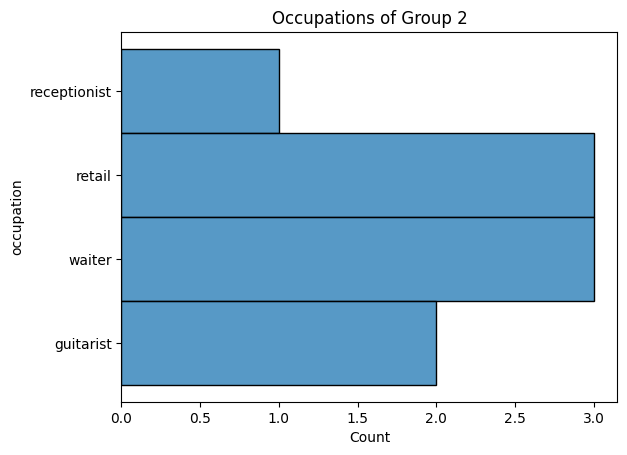

In [180]:
sns.histplot(df[df["labels"] == 2], y="occupation")
plt.title("Occupations of Group 2")